# Principal component analysis (PCA)

In [5]:
import numpy as np 
import pandas as pd

np.random.seed(23)

# --- Class 1 ---
mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])

class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
df1 = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 1

# --- Class 2 ---
mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])

class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
df2 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df2['target'] = 0

# --- Combine and shuffle ---
df = pd.concat([df1, df2], ignore_index=True)
df = df.sample(frac=1, random_state=23).reset_index(drop=True)

print(df.head())


   feature1  feature2  feature3  target
0 -0.331617 -1.632386  0.619114       1
1  1.010229  1.437830  2.327788       0
2  0.241106 -0.952510 -0.136267       1
3  1.676860  4.187503 -0.080565       0
4  2.823378 -0.332863  2.637391       0


# 3d plot 

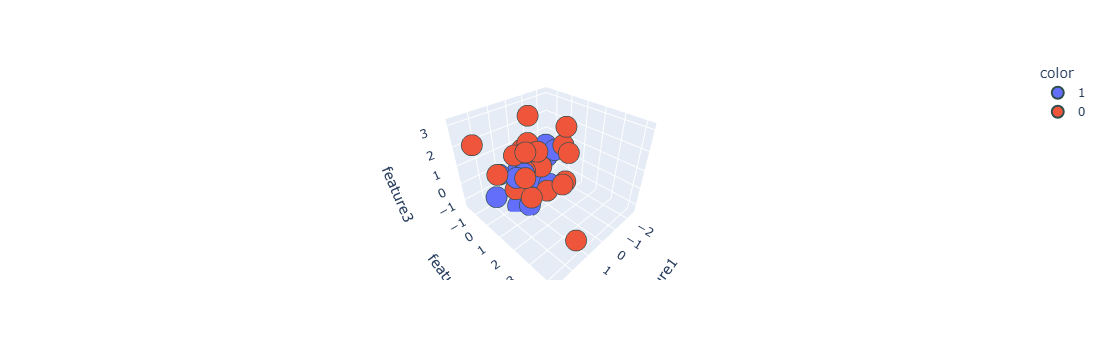

In [9]:
import plotly.express as px
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
                    color = df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [12]:
# step1 - Apply standard scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [13]:
# step2 - Find covariance Matrix 
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.080118  ]
 [0.080118   1.02564103]]


In [14]:
# stpe 3 - finding eigin value and eigin value
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [15]:
eigen_values

array([1.10575903, 0.94552303])

In [16]:
eigen_vectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [17]:
pc = eigen_vectors[0:2]
pc

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [19]:
from sklearn.decomposition import PCA

# keep 2 principal components
pca = PCA(n_components=2)
transformed_df = pca.fit_transform(df.iloc[:, 0:3])

# make DataFrame
new_df = pd.DataFrame(transformed_df, columns=['PC1', 'PC2'])
new_df['target'] = df['target'].values

print(new_df.head())


        PC1       PC2  target
0 -1.694055  0.454694       1
1  1.654764  0.691473       0
2 -1.349328 -0.377883       1
3  2.572050 -1.265530       0
4  1.544065 -0.194608       0


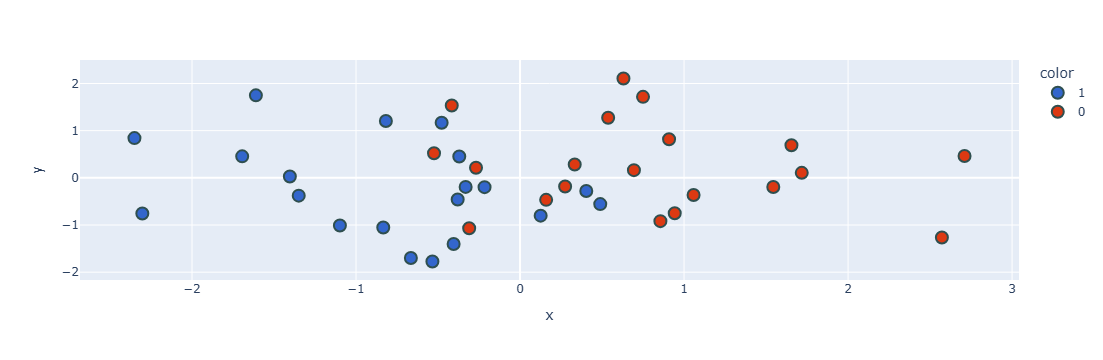

In [21]:
import plotly.express as px

new_df['target'] = new_df['target'].astype(str)

fig = px.scatter(
    x=new_df['PC1'],
    y=new_df['PC2'],
    color=new_df['target'],
    color_discrete_sequence=px.colors.qualitative.G10
)

fig.update_traces(
    marker=dict(
        size=12,
        line=dict(width=2, color='DarkSlateGrey')
    ),
    selector=dict(mode='markers')
)

fig.show()
